<a href="https://colab.research.google.com/github/DanielKyung/AI_18_Section1_project/blob/main/n211a_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# 🌱 **기본 과제**

이번 노트에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다.

다음 데이터셋은 미국 시애틀 King County 지역의 2014년 5월 ~ 2015년 5월 주택 판매 가격 데이터입니다.
   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)

이 데이터를 사용해 다음 과제를 마크다운과 코드를 활용하여 진행해 주세요.

## **Part 1. Linear Regression**

### **1-1. 데이터 준비하기** 

- 데이터셋을 불러오세요. 
- 특성들과 타겟(price) 간의 상관계수를 계산하고, 상관계수가 가장 높은 특성을 찾으세요.
- 상관계수가 가장 높은 특성과 타겟을 scatter plot으로 시각화 하세요.
  - x축은 특성, y축은 타겟을 나타내야 합니다. 

##### **Q1. 타겟과 상관계수가 가장 높은 특성의 이름을 제출해 주세요.**

In [2]:
# 데이터셋을 불러옵니다. 

import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
## 이 곳에서 과제를 진행해주세요.
df.corr().sort_values(by = 'price', ascending = False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
grade,0.008130,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,-0.010842,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_living15,-0.002901,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.086463,0.280439,-0.092824,0.713202,0.731870,0.200355,0.326229,-0.002673,-0.279033,0.048858,0.334605,1.000000,0.183192
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
sqft_basement,-0.005151,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
lat,-0.001891,0.307003,-0.008931,0.024573,0.052529,-0.085683,0.049614,-0.014274,0.006157,-0.014941,0.114084,-0.000816,0.110538,-0.148122,0.029398,0.267048,1.000000,-0.135512,0.048858,-0.086419


### **1-2. 기준모델**

- `sqft_living`과 `price`의 scatter plot을 그리고, 평균 기준모델을 시각화 하세요. 

##### **Q2. 기준모델에서 사용한 평균값을 제출해 주세요. (소수점 이하 반올림)**

In [8]:
import numpy as np # numeric computation 수학적 계산
import matplotlib.pyplot as plt # visualization 시각화
import seaborn as sns
import math
import random

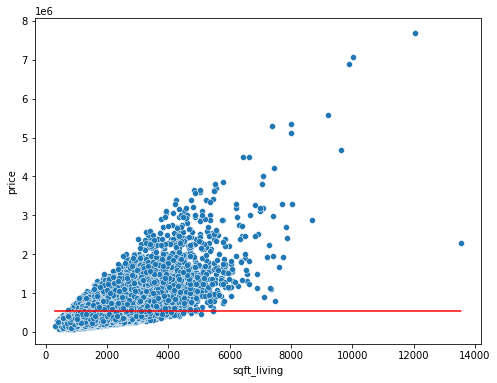

In [9]:
## 이 곳에서 과제를 진행해주세요.
# predict: 평균 기준모델
plt.figure(figsize=(8,6))
predict = df['price'].mean()
sns.lineplot(x=df['sqft_living'], y=predict, color='red')

sns.scatterplot(x=df['sqft_living'], y = df['price'])
plt.show()

In [10]:
df['price'].mean()

540088.1417665294

### **1-3. Simple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 단순선형회귀 모델을 만드세요.
  - 특성은 `sqft_living`이고, 타겟은 `price`입니다.
- 모델 학습 후, 특성 `sqft_living`에 대한 타겟 `price`의 예측값을 구하세요. 

In [11]:
# scikit-learn에서 Linear Rergression을 가져옵니다.
from sklearn.linear_model import LinearRegression

# 특성과 타겟값을 변수에 저장하고 X 행렬과 y 벡터를 만듭니다. 
feature = ['sqft_living']
target = 'price'

X = df[feature]
y = df[target]

print(X.shape)
print(y.shape)
"""
(1460, 1)
(1460,)
"""

# 모델을 학습합니다.
simple_ols = LinearRegression()
simple_ols.fit(X, y)

(21613, 1)
(21613,)


LinearRegression()

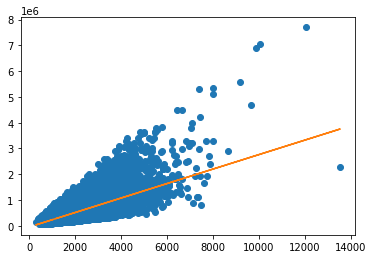

In [14]:
plt.plot(X, y, 'o')
plt.plot(X,simple_ols.predict(X))
plt.show()

In [17]:
simple_ols.predict(X)[0]

287555.06702451495

In [24]:
X_simple = df[feature]
y_simple = simple_ols.predict(X_simple)

##### **Q3. 단순선형회귀 모델이 예측한 결과에서 index가 0인 값을 제출해 주세요. (소수점 이하 반올림)**

### **1-4. Multiple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 다중선형회귀 모델을 만드세요. 
  - 특성은 `sqft_living`, `bathrooms`이고, 타겟은 `price`입니다.
- 모델 학습 후, 두 특성 `sqft_living`, `bathrooms`에 대한 타겟 `price`의 예측값을 구하세요. 

In [18]:
features2 = ['sqft_living', 'bathrooms']
target = 'price'

X2 = df[features2]
y = df[target]

multiple_ols = LinearRegression()
multiple_ols.fit(X2, y)

LinearRegression()

##### **Q4. 다중선형회귀 모델이 예측한 결과에서 index가 0인 값을 제출해 주세요. (소수점 이하 반올림)**

In [19]:
## 이 곳에서 과제를 진행해주세요.
multiple_ols.predict(X2)[0]

290371.19606650237

In [25]:
X_multiple = df[features2]
y_multiple = multiple_ols.predict(X_multiple)

## **Part 2. 평가지표**

**Part 1**에서 구한 기준모델, 단순선형회귀, 다중선형회귀의 성능을 평가해 봅니다.
- 각 모델의 mse, rmse, mae, $R^2$ 값을 구하세요. 
- 위에서 구한 평가지표를 비교해 보고, 어느 모델의 성능이 가장 좋을지 생각해 보세요. 

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [23]:
y_real = df['price']

def eval_models(y_pred, y_real=y_real) :
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    return mse, rmse, mae, r2

In [29]:
y_base = [predict]*len(df)

base_mse, base_rmse, base_mae, base_r2 = eval_models(y_base)
simple_mse, simple_rmse, simple_mae, simple_r2 = eval_models(y_simple)
multiple_mse, multiple_rmse, multiple_mae, multiple_r2 = eval_models(y_multiple)

In [30]:
comparison_metrics = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Simple', 'Multiple'])
comparison_metrics['Base'] = [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Simple'] = [simple_mse, simple_rmse, simple_mae, simple_r2]
comparison_metrics['Multiple'] = [multiple_mse, multiple_rmse, multiple_mae, multiple_r2]
comparison_metrics

,Base,Simple,Multiple
mse,1.347761e+11,6.835129e+10,6.834448e+10
rmse,3.671187e+05,2.614408e+05,2.614278e+05
mae,2.339417e+05,1.736883e+05,1.736970e+05
r2,0.000000e+00,4.928532e-01,4.929037e-01


##### **Q5. 다중선형회귀 모델의 $R^2$을 반올림하여 소수점 첫째 자리까지 구한 값을 제출해 주세요.**

In [28]:
## 이 곳에서 과제를 진행해주세요.
round(multiple_r2,1)

0.5

##### **Q6. 단순선형회귀, 다중선형회귀 모델의 성능이 기준모델보다 나아졌나요?** 

In [34]:
## 이 곳에서 과제를 진행해주세요.
# 단순선형회귀 모델의 R2가 증가한 것으로 보아 기준 모델보다 성능이 나아졌다.

## **Part 3. 모델 해석**

`LinearRegression` 객체의 `coef_`와 `intercept_` 속성을 사용하여 모델 식을 구합니다.
- 단순선형회귀식을 구하세요. 
- 다중선형회귀식을 구하세요. 

##### **Q7. 단순선형회귀 모델의 coefficient를 제출해 주세요. (소수점 이하 반올림)**

In [33]:
## 이 곳에서 과제를 진행해주세요.
# 회귀계수
print('coefficient : ', simple_ols.coef_)

coefficient :  [280.6235679]


##### **Q8. 다중선형회귀 모델의 `sqft_living`의 coefficient를 제출해 주세요. (소수점 이하 반올림)**

In [35]:
## 이 곳에서 과제를 진행해주세요.
# 회귀계수
print('coefficient : ', multiple_ols.coef_)

coefficient :  [  283.89187322 -5164.60042317]


# 🥇 **도전 과제**

## **Part 4. Linear Regression - Advanced**

### **4-1. Discussion**

- 단순선형회귀 모델을 만들기 위해 전제되어야 하는 조건들에 대해 설명해 보세요.

In [ ]:
"""
종속변수와 독립변수 간에 선형관계가 존재할 것
독립변수와 오차항 간에 상관관계가 없을 것
오차항의 기대값은 0
오차항의 분산은 모든 관찰치에서 일정할 것
오차항 간에 상관관계가 없을 것
오차항은 정규분포할 것
"""

### **4-2. Simple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 단순선형회귀 모델을 만드세요.
  - **기본 과제**에서 사용한 특성 외에 다른 특성을 사용합니다.
  - 타겟은 `price` 입니다. 
- 모델 학습 후, 사용한 특성에 대한 타겟 `price`의 예측값을 구하세요. 

In [41]:
feature3 = ['sqft_above']
target = 'price'

X3 = df[feature3]
y = df[target]

print(X.shape)
print(y.shape)
"""
(1460, 1)
(1460,)
"""

# 모델을 학습합니다.
simple_ols2 = LinearRegression()
simple_ols2.fit(X3, y)

(21613, 1)
(21613,)


LinearRegression()

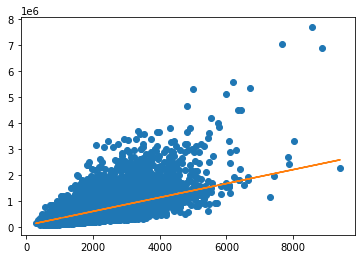

In [42]:
plt.plot(X3, y, 'o')
plt.plot(X3,simple_ols2.predict(X3))
plt.show()

In [44]:
X_simple2 = X3
y_simple2 = simple_ols2.predict(X_simple2)

In [45]:
y_simple2

array([376751.55360603, 642540.0094903 , 266677.54662366, ...,
       333795.84356413, 489510.29246602, 333795.84356413])

### **4-3. Multiple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 다중선형회귀 모델을 만드세요.
  - 3가지 이상의 특성을 사용합니다.
  - 타겟은 `price`입니다.
- 모델 학습 후, 사용한 특성들에 대한 타겟 `price`의 예측값을 구하세요. 

In [53]:
features4 = ['sqft_living', 'bathrooms', 'bedrooms', 'view']
target = 'price'

X4 = df[features4]
y = df[target]

multiple_ols2 = LinearRegression()
multiple_ols2.fit(X4, y)

LinearRegression()

In [54]:
X_multiple2 = X4
y_multiple2 = multiple_ols2.predict(X_multiple2)

In [55]:
y_multiple2

array([271659.32617816, 672761.55855383, 205733.5767821 , ...,
       272257.61710699, 406131.39986526, 272257.61710699])

### **4-4. 평가지표**

**4-2**, **4-3**에서 구한 단순선형회귀, 다중선형회귀의 성능을 평가해 봅니다.
- 각 모델의 mse, rmse, mae, $R^2$ 값을 구하세요. 
- 위에서 구한 평가지표와 **Part 1**에서 구한 평가지표 스코어에 대하여, 해당 결과를 통해 얻을 수 있는 인사이트는 어떤 것이 있는지 설명해 보세요.

In [56]:
simple_mse2, simple_rmse2, simple_mae2, simple_r2_2 = eval_models(y_simple2)
multiple_mse2, multiple_rmse2, multiple_mae2, multiple_r2_2 = eval_models(y_multiple2)

In [57]:
comparison_metrics2 = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Simple', 'Multiple'])
comparison_metrics2['Base'] = [base_mse, base_rmse, base_mae, base_r2]
comparison_metrics2['Simple'] = [simple_mse2, simple_rmse2, simple_mae2, simple_r2_2]
comparison_metrics2['Multiple'] = [multiple_mse2, multiple_rmse2, multiple_mae2, multiple_r2_2]
comparison_metrics2

,Base,Simple,Multiple
mse,1.347761e+11,8.535215e+10,6.134362e+10
rmse,3.671187e+05,2.921509e+05,2.476764e+05
mae,2.339417e+05,1.918575e+05,1.643916e+05
r2,0.000000e+00,3.667118e-01,5.448481e-01


단순선형회귀 모델과 다중 선형 회귀 모델의 mse, rmse, mae가 감소한 것으로 보아 기준 모델보다 성능이 나아졌다.

단순선형회귀 모델과 다중 선형 회귀 모델의 R2가 증가한 것으로 보아 기준 모델보다 성능이 나아졌다.

단순선형회귀 모델보다 다중 선형 회귀 모델의 성능이 더 좋다.